In [16]:
from preprocessing import preprocess_pipeline
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 이상치 데이터 평가
anomaly_file_path = "이상치데이터예제.csv"
seq_length = 10

In [18]:
# 데이터 전처리
X_anomaly = preprocess_pipeline(anomaly_file_path, seq_length)
print(f"Preprocessed anomaly data shape: {X_anomaly.shape}")

Preprocessed anomaly data shape: (19, 10, 4)


In [22]:
# 저장된 모델 로드
autoencoder = load_model('autoencoder_model.h5')

In [23]:
# 모델 평가
reconstructed = autoencoder.predict(X_anomaly)
reconstruction_errors = np.mean(np.square(X_anomaly - reconstructed), axis=(1, 2))
print("Reconstruction errors calculated.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
Reconstruction errors calculated.


Number of anomalies detected: 2
Reconstruction errors for detected anomalies:
[0.75050911 0.8677876 ]


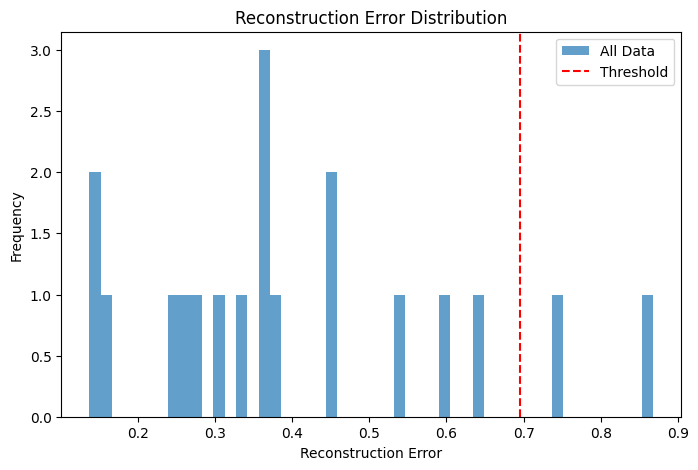

In [ ]:
# 이상치 탐지
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)
anomalies = reconstruction_errors > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

anomaly_indices = np.where(anomalies)[0]
print(f"Reconstruction errors for detected anomalies:\n{reconstruction_errors[anomaly_indices]}")

plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="All Data")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()